## **Проект**
### **Классификация картин по жанрам**

Жанры для классификации
- портрет 
- пейзаж 

### Метрики для классификации


1. Яркостные характеристики изображений

Создим датасеты яркостных изображений (по 30 штук) с сайта [Art-dot](https://art-dot.ru/) 

In [10]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import cv2

image_folder_portraits = '/home/ermak/semester_2/Images/Project/portraits/'
image_folder_landscapes = '/home/ermak/semester_2/Images/Project/landscapes/'

files_portraits = os.listdir(image_folder_portraits) # список изображений
files_landscapes = os.listdir(image_folder_landscapes)

df = pd.DataFrame(files_portraits, columns=['Портреты'])
new_column = files_landscapes
df['Пейзажи'] = new_column

df

,Портреты,Пейзажи
0,perov_portret_pisatelya_dalya.jpg,nikifor_krylov_russkaya_zima.jpg
1,kramskoi_akter_aleksandr_pavlovich_lenskii_v_o...,ivan_aivazovskii_neapolitanskii_zaliv.jpg
2,argunov_ivan_portret_neizvestnoi_krestyanki_v_...,ivan_shishkin_utro_v_sosnovom_lesu.jpg
3,rokotov_portret_aleksandry_petrovny_struiskoi.jpg,ivana_shishkin_rechka_ligovka_v_konstantinovke...
4,nevrev_portret_rybakova.jpg,klod_mone_topolya_vozle_serebristoi.jpg
5,boris_kustodiev_kupchiha_za_chaem.jpg,ivan_shishkin_ruchei_v_berjozovom_lesu.jpg
6,dmitrii_levitskii_portret_ekateriny_nelidovoi.jpg,andrei_martynov_narodnye_gulyaniya_v_dvortsovo...
7,serov_devochka_s_persikami.jpg,ivan_shishkin_opushka_lesa.jpg
8,rembrandt_saskiya_v_obraze_flory.jpg,andrei_martynov_tsarskoselskii_park.jpg
9,zhan_mark_nate_petr_rytsarskih_dospehah.jpg,konstantin_korovin_zimnii_peizazh_i.jpg


Сравним распределение яркостей портретов и пейзажей

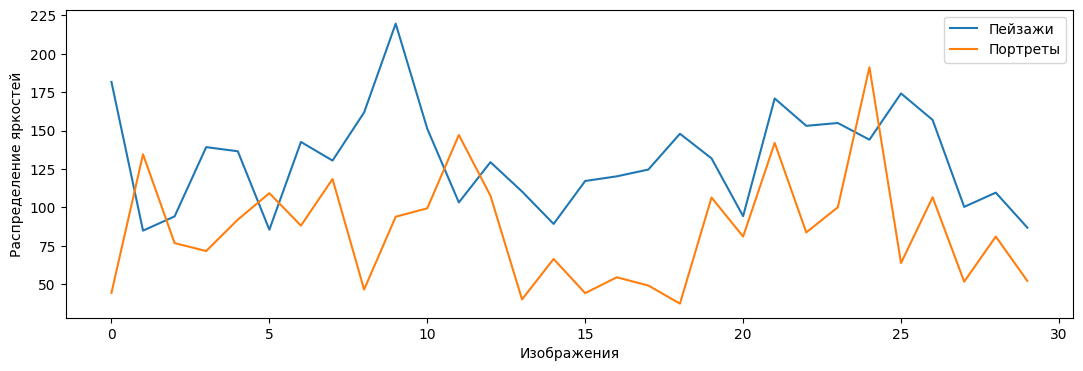

In [173]:
def pixels_dataset(files, path):
    mean_bright_list = []

    for file in files:
        full_path = path + file
        image = Image.open(full_path)
        image_pixels = np.asarray(image)
        bright = np.zeros((image.size[1], image.size[0]))
        
        for i in range(image.size[1]):
            for j in range(image.size[0]):
                bright[i,j] = 0.222 * image_pixels[i][j][0] + 0.707 * image_pixels[i][j][1] + 0.071 * image_pixels[i][j][2]

        mean_bright = np.mean(bright) 
        mean_bright_list.append(mean_bright)

    return mean_bright_list

mean_pixel_brightness_landscapes = pixels_dataset(files_landscapes, image_folder_landscapes)
mean_pixel_brightness_portraits = pixels_dataset(files_portraits, image_folder_portraits)

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(mean_pixel_brightness_landscapes, label='Пейзажи')
ax.plot(mean_pixel_brightness_portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Распределение яркостей') 
ax.legend()           # для легенды
plt.show()

Согласно распределению, средняя яркость изображения, как правило, выше у пейзажей, чем у портретов.

2. Размеры изображений

Сравним отношение сторон пезайжей и портретов

In [155]:
def sides_image(image_folder):
    files = os.listdir(image_folder)
    pixels_list = []

    width = np.zeros((30, 1))
    height = np.zeros((30, 1))
    relation_sides = np.zeros((30, 1))
    i = 0

    for image_name in files:
        image_path = os.path.join(image_folder, image_name)
        image = Image.open(image_path)
        width[i] = image.size[0]
        height[i] = image.size[1]
        relation_sides[i] = width[i] / height[i]           # отношение ширины к высоте изображения
        image_pixels = np.asarray(image)
        image_pixels_flattened = image_pixels.flatten()
        pixels_list.append(image_pixels_flattened)
        i += 1

    pixels_dataset = np.array(pixels_list, dtype=object)

    vect = np.zeros(len(pixels_dataset)).reshape((len(pixels_dataset), 1)) 

    relation_sides = relation_sides.reshape((len(relation_sides), 1))

    for i in range(len(relation_sides)):
        if relation_sides[i] > 1:         # отношение сторон        
            vect[i] = 1         # 1 - ширина больше высоты
        else:
            vect[i] = 0         # 0 - высота больше ширины 
    print(vect, relation_sides)

sides_image(image_folder_portraits)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] [[0.853     ]
 [0.87      ]
 [0.8       ]
 [0.767     ]
 [0.705     ]
 [0.997     ]
 [0.611     ]
 [0.88888889]
 [0.813     ]
 [0.775     ]
 [0.79243354]
 [1.32701422]
 [0.801     ]
 [0.817     ]
 [0.786     ]
 [0.874     ]
 [0.882     ]
 [0.864     ]
 [0.854     ]
 [0.687     ]
 [0.822     ]
 [0.701     ]
 [0.805     ]
 [0.763     ]
 [0.83870968]
 [0.702     ]
 [0.84334764]
 [0.788     ]
 [0.67      ]
 [0.816     ]]


In [156]:
sides_image(image_folder_landscapes)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] [[1.15606936]
 [1.28375   ]
 [1.47635525]
 [1.51933702]
 [1.202     ]
 [1.47679325]
 [1.3986014 ]
 [1.72559367]
 [1.45248227]
 [1.26875   ]
 [1.56821026]
 [0.7734375 ]
 [1.77439797]
 [1.5975    ]
 [1.66270784]
 [0.77642857]
 [1.355     ]
 [1.24      ]
 [1.3044586 ]
 [1.47434293]
 [1.58550396]
 [1.67461538]
 [1.5025    ]
 [1.44469526]
 [1.53340635]
 [1.42348754]
 [1.34952767]
 [1.32166667]
 [1.73400673]
 [1.216     ]]


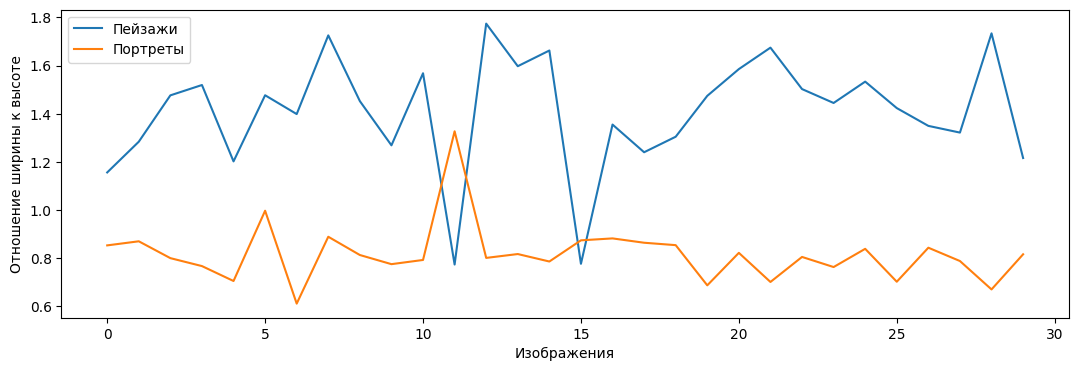

In [12]:
def sides_image_1(image_folder):
    files = os.listdir(image_folder)
    pixels_list = []

    width = np.zeros((30, 1))
    height = np.zeros((30, 1))
    relation_sides = np.zeros((30, 1))
    i = 0

    for image_name in files:
        image_path = os.path.join(image_folder, image_name)
        image = Image.open(image_path)
        width[i] = image.size[0]
        height[i] = image.size[1]
        relation_sides[i] = width[i] / height[i]           # отношение ширины к высоте изображения
        i += 1

    return relation_sides[:,0].tolist()


Sides_portraits = sides_image_1(image_folder_portraits)
Sides_landscapes = sides_image_1(image_folder_landscapes)

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(Sides_landscapes, label='Пейзажи')
ax.plot(Sides_portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Отношение ширины к высоте') 
ax.legend(loc='best')         
plt.show()

Как правило, ширина пейзажей больше их высоты, у портретов все наоборот, - высота больше их ширины.

3. Соотношение цветов на изображении

Посмотрим на соотношение красного и зеленого цветов на изображении

Количество портретов больше либо равно границе: 22 (из 30)
Количество пейзажей меньше границы: 27 (из 30)


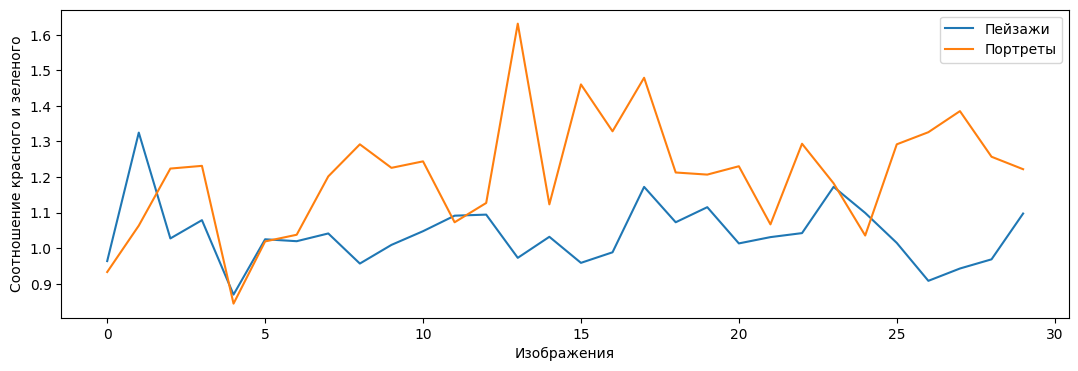

In [157]:
def correlation(files, path):
    img_arrs = []
    for file in files:
        full_path = path + file
        img = Image.open(full_path)
        img_arr = np.array(img.convert('RGB'))
        img_arrs.append(img_arr)

    r_g = []
    for img_arr in img_arrs:
        r_mean = np.mean(img_arr[:,:,0])
        g_mean = np.mean(img_arr[:,:,1])
        r_g_correlation = r_mean / g_mean
        r_g.append(r_g_correlation)
        
    return r_g

portraits = correlation(files_portraits, image_folder_portraits)
landscapes = correlation(files_landscapes, image_folder_landscapes)

count = len([x for x in portraits if x >= 1.12]) # 22
print('Количество портретов больше либо равно границе:', count, '(из 30)')

count = len([x for x in landscapes if x < 1.12]) # 27
print('Количество пейзажей меньше границы:', count, '(из 30)')

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(landscapes, label='Пейзажи')
ax.plot(portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Соотношение красного и зеленого') 
ax.legend()         
plt.show()

Соотношение красного и синего

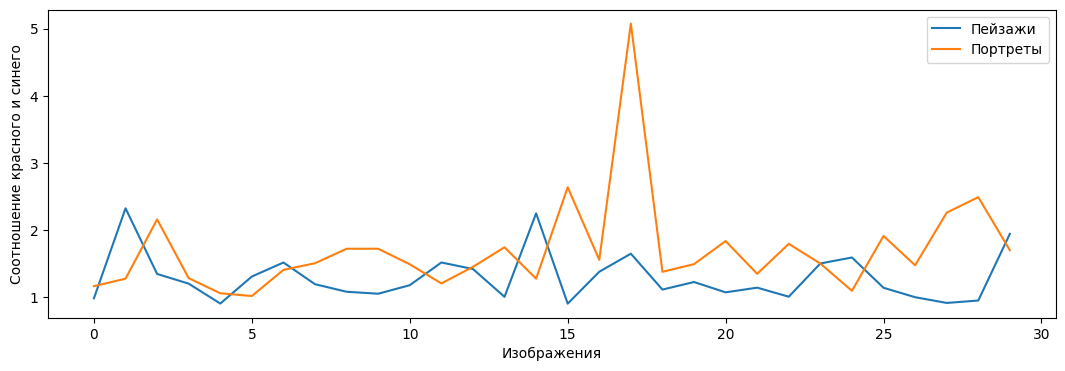

In [158]:
def correlation(files, path):
    img_arrs = []
    for file in files:
        full_path = path + file
        img = Image.open(full_path)
        img_arr = np.array(img.convert('RGB'))
        img_arrs.append(img_arr)

    r_b = []
    for img_arr in img_arrs:
        r_mean = np.mean(img_arr[:,:,0])
        b_mean = np.mean(img_arr[:,:,2])
        r_b_correlation = r_mean / b_mean
        r_b.append(r_b_correlation)

    return r_b

portraits = correlation(files_portraits, image_folder_portraits)
landscapes = correlation(files_landscapes, image_folder_landscapes)

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(landscapes, label='Пейзажи')
ax.plot(portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Соотношение красного и синего') 
ax.legend()         
plt.show()

Соотношение зеленого и синего

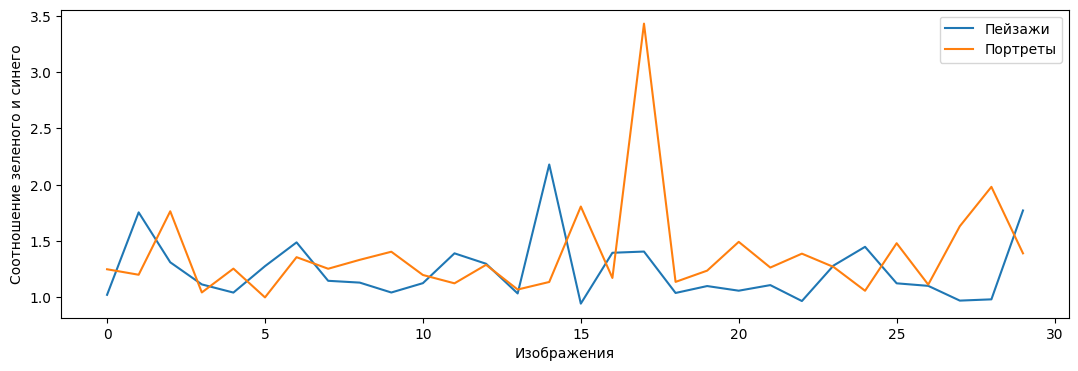

In [159]:
def correlation(files, path):
    img_arrs = []
    for file in files:
        full_path = path + file
        img = Image.open(full_path)
        img_arr = np.array(img.convert('RGB'))
        img_arrs.append(img_arr)

    g_b = []
    for img_arr in img_arrs:
        g_mean = np.mean(img_arr[:,:,1])
        b_mean = np.mean(img_arr[:,:,2])
        g_b_correlation = g_mean / (b_mean + 1e-8)
        g_b.append(g_b_correlation)
    
    return g_b

portraits = correlation(files_portraits, image_folder_portraits)
landscapes = correlation(files_landscapes, image_folder_landscapes)

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(landscapes, label='Пейзажи')
ax.plot(portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Соотношение зеленого и синего') 
ax.legend()         
plt.show()

Судя по распределениям, наиболее показательными являются соотношение красного и зеленого цветов. Поэтому мы можем выделить приблизительную границу между соотношением данных цветов в портретах и пейзажах:

При границе `~1.12`
- Количество портретов больше либо равно границе: 22 (из 30)
- Количество пейзажей меньше границы: 27 (из 30)

Кроме того, можно посмотреть на отношение зеленого и синего ко всем цветам на изображении

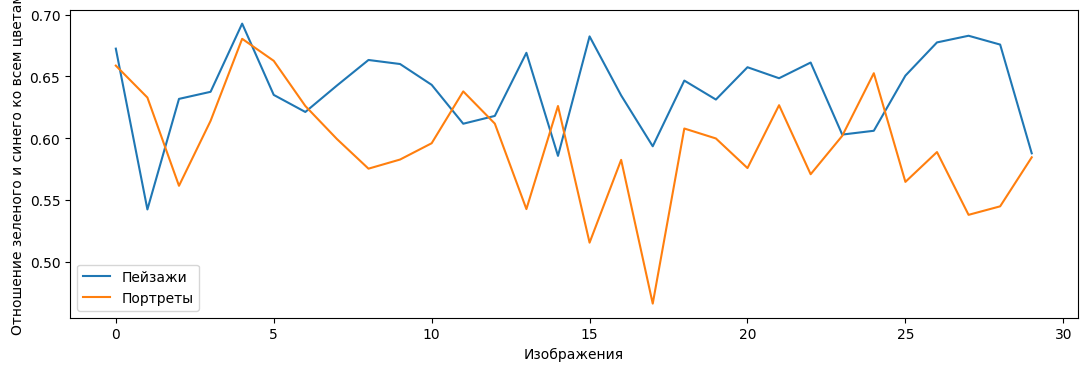

In [160]:
def correlation(files, path):
    img_arrs = []
    for file in files:
        full_path = path + file
        img = Image.open(full_path)
        img_arr = np.array(img.convert('RGB'))
        img_arrs.append(img_arr)

    g_b = []
    for img_arr in img_arrs:
        r_mean = np.mean(img_arr[:,:,0])
        g_mean = np.mean(img_arr[:,:,1])
        b_mean = np.mean(img_arr[:,:,2])
        g_b_correlation = (g_mean + b_mean) / (r_mean + g_mean + b_mean)
        g_b.append(g_b_correlation)
        
    return g_b

portraits = correlation(files_portraits, image_folder_portraits)
landscapes = correlation(files_landscapes, image_folder_landscapes)

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(landscapes, label='Пейзажи')
ax.plot(portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Отношение зеленого и синего ко всем цветам') 
ax.legend()         
plt.show()

Согласно графику, в пейзажах отношение зеленого и синего к остальным цветам изображения преобладает.

Взглянем на среднее голубого канала

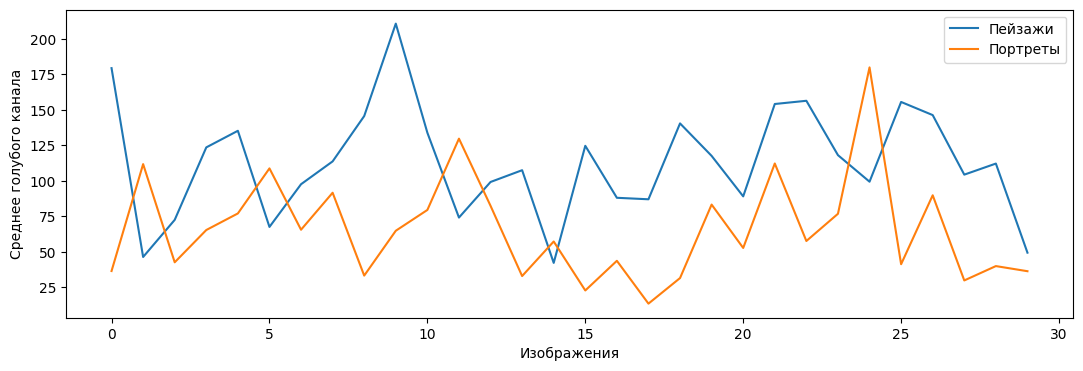

In [161]:
def b_mean(path):
    mean_list = []
    for filename in os.listdir(path):
        full_path = os.path.join(path, filename)
        img = cv2.imread(full_path)
        b = img[:,:,0]
        mean_b = np.mean(b)
        mean_list.append(mean_b)
    return mean_list

portraits = b_mean(image_folder_portraits)
landscapes = b_mean(image_folder_landscapes)

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(landscapes, label='Пейзажи')
ax.plot(portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Среднее голубого канала') 
ax.legend()         
plt.show()

В целом, мы можем заметить среднее преобладание голубого канала на пейзажах, нежели портретах.

4. Красный цвет в области лица

Отношение красного в области лица к общей сумме значений всех цветов на изображении

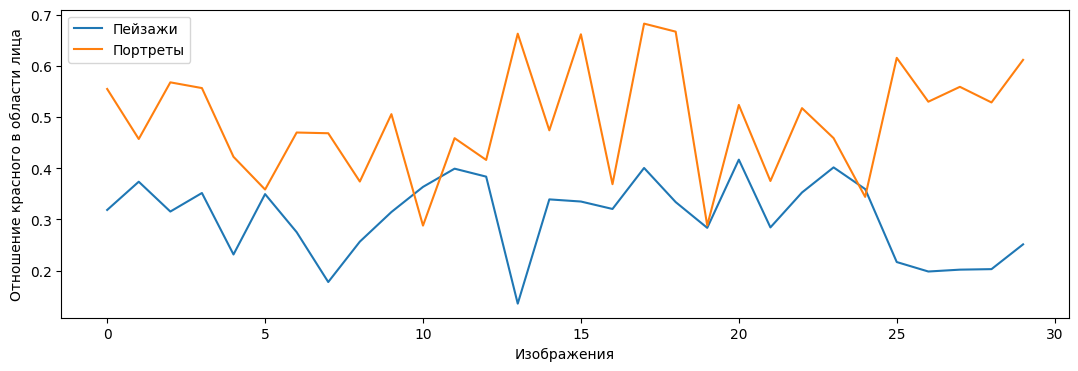

In [162]:
def correlation(files, path):
    img_arrs = []
    for file in files:
        full_path = path + file
        img = Image.open(full_path)
        img_arr = np.array(img.convert('RGB'))
        img_arrs.append(img_arr)

    r = []
    for img_arr in img_arrs:
        # где 0.395 - это отношение начала лица (по ширине) к общему размеру изображения (по ширине) в среднем (800x0.395)
        # где 0.598 - это отношение конца лица (по ширине) к общему размеру изображения (по ширине) в среднем 
        # где 0.213 - это отношение начала лица (по высоте) к общему размеру изображения (по высоте) в среднем 
        # где 0.428 - это отношение начала лица (по высоте) к общему размеру изображения (по высоте) в среднем 
        r_mean = np.mean(img_arr[int(img.size[0] * 0.395):int(img.size[0] * 0.598), int(img.size[1] * 0.213):int(img.size[1] * 0.428), 0])
        g_mean = np.mean(img_arr[:, :, 1])
        b_mean = np.mean(img_arr[:, :, 2])
        r_correlation = r_mean / (r_mean + g_mean + b_mean)
        r.append(r_correlation)
        
    return r

portraits = correlation(files_portraits, image_folder_portraits)
landscapes = correlation(files_landscapes, image_folder_landscapes)

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(landscapes, label='Пейзажи')
ax.plot(portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Отношение красного в области лица') 
ax.legend()         
plt.show()

Согласно распределению, отношение красного в области лица к общей сумме значений всех цветов на изображении преобладает у портретов.

5. Дисперсия каналов

Посмотрим на дисперсию синего канала

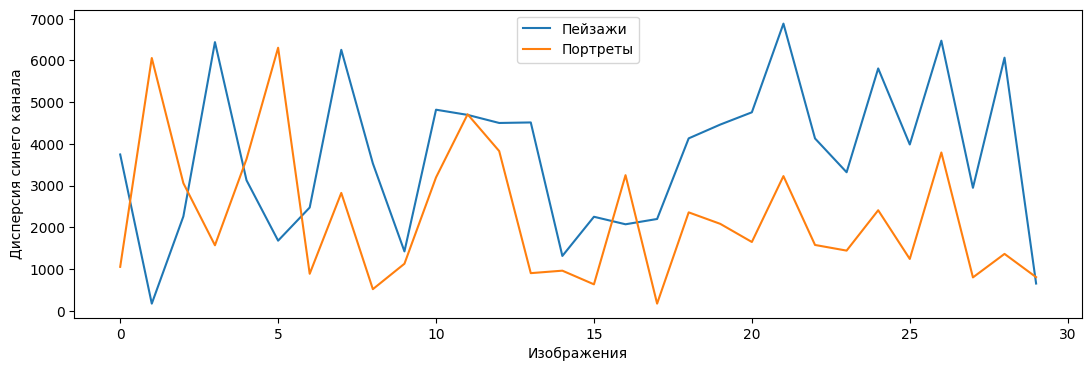

In [163]:
def variances(path):
    var_list = []
    for filename in os.listdir(path):
        full_path = os.path.join(path, filename)
        img = cv2.imread(full_path)
        b = img[:,:,0]
        b_var = np.var(b)
        var_list.append(b_var)
    return var_list

portraits = variances(image_folder_portraits)
landscapes = variances(image_folder_landscapes)

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(landscapes, label='Пейзажи')
ax.plot(portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Дисперсия синего канала') 
ax.legend()         
plt.show()

Дисперсия зеленого канала

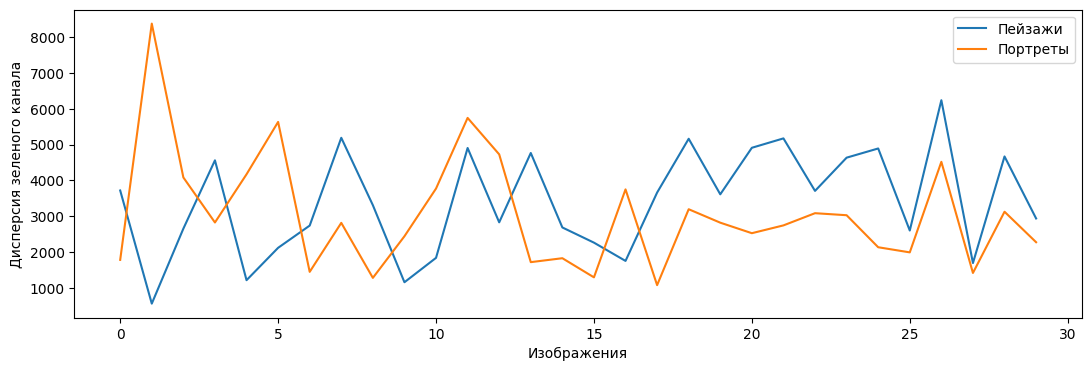

In [164]:
def variances(path):
    var_list = []
    for filename in os.listdir(path):
        full_path = os.path.join(path, filename)
        img = cv2.imread(full_path)
        g = img[:,:,1]
        g_var = np.var(g)
        var_list.append(g_var)
    return var_list

portraits = variances(image_folder_portraits)
landscapes = variances(image_folder_landscapes)

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(landscapes, label='Пейзажи')
ax.plot(portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Дисперсия зеленого канала') 
ax.legend()         
plt.show()

Дисперсия красного канала

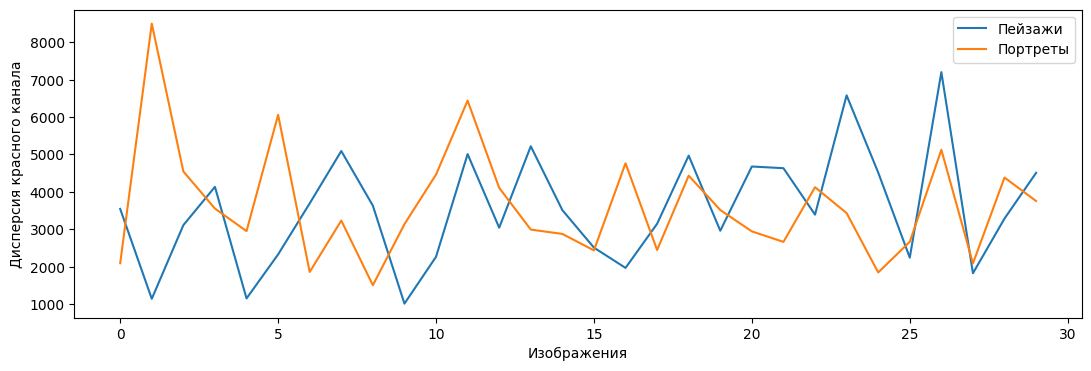

In [165]:
def variances(path):
    var_list = []
    for filename in os.listdir(path):
        full_path = os.path.join(path, filename)
        img = cv2.imread(full_path)
        r = img[:,:,2]
        r_var = np.var(r)
        var_list.append(r_var)
    return var_list

portraits = variances(image_folder_portraits)
landscapes = variances(image_folder_landscapes)

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(landscapes, label='Пейзажи')
ax.plot(portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Дисперсия красного канала') 
ax.legend()         
plt.show()

По распределению дисперсий сложно что-либо сказать. 

6. Отношение участков на изображении

Сравним среднее значение яркости верхней и нижней половины изображения

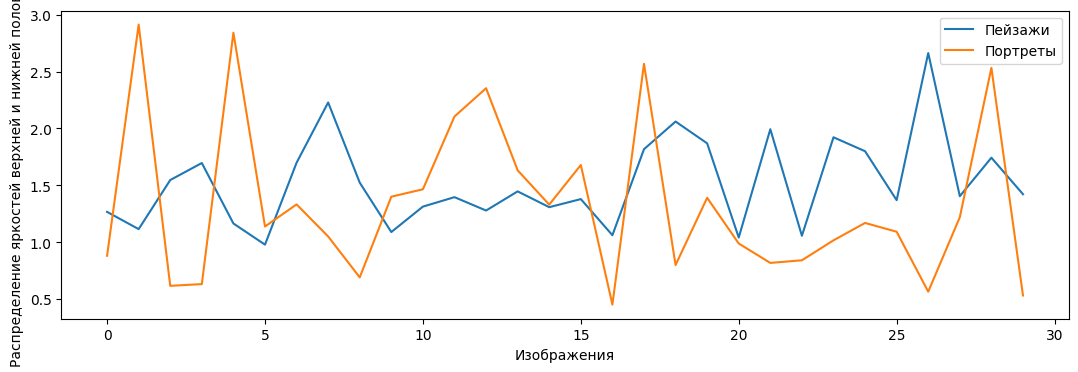

In [177]:
def bright_image(files, path):
    bright_ratios = []

    for file in files:
        full_path = path + file
        image = Image.open(full_path)
        image_pixels = np.asarray(image)
        bright = np.zeros((image.size[1], image.size[0]))

        for i in range(image.size[1]):
            for j in range(image.size[0]):
                bright[i, j] = 0.222 * image_pixels[i][j][0] + 0.707 * image_pixels[i][j][1] + 0.071 * image_pixels[i][j][2]

        upper_bright = np.mean(bright[:image.size[1] // 2])
        lower_bright = np.mean(bright[image.size[1] // 2:])

        bright_ratio = upper_bright / lower_bright
        bright_ratios.append(bright_ratio)

    return bright_ratios

bright_image_landscapes = bright_image(files_landscapes, image_folder_landscapes)
bright_image_portraits = bright_image(files_portraits, image_folder_portraits)

fig, ax = plt.subplots(figsize=(13,4))
ax.plot(bright_image_landscapes, label='Пейзажи')
ax.plot(bright_image_portraits, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Распределение яркостей верхней и нижней половины') 
ax.legend()
plt.show()

По данному распределению сложно что-либо сказать.

7. Применим фильтр Собеля

Вычислим градиент Собеля с помощью маски

In [184]:
def grad_sob(files, path):
    gradient_list = []
    for file in files:
        full_path = path + file
        img = cv2.imread(full_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        height, width = gray.shape

        sobelx = np.zeros((height, width))
        sobely = np.zeros((height, width))

        for i in range(1, height-1):
            for j in range(1, width-1):
                sobelx[i,j] = (gray[i-1, j-1] + 2 * gray[i, j-1] + gray[i+1, j-1]) - (gray[i-1, j+1] + 2 * gray[i, j+1] + gray[i+1, j+1]) # для x
                sobely[i,j] = (gray[i-1, j-1] + 2 * gray[i-1, j] + gray[i-1, j+1]) - (gray[i+1, j-1] + 2 * gray[i+1, j] + gray[i+1, j+1]) # для y

        gradient = np.sqrt(sobelx ** 2 + sobely ** 2) # объединяем градиенты 

        gradient_list.append(gradient)
    return gradient_list


grad_sob_portraits = grad_sob(files_landscapes, image_folder_landscapes)
grad_sob_landscapes = grad_sob(files_portraits, image_folder_portraits)

Найдем среднее среди значений градиентов

In [185]:
def mean_grad(dataset):
    mean_list = []
    for i in range(len(dataset)):
        mean_g = np.mean(dataset[i])
        mean_list.append(mean_g)
    return mean_list

grad_sob_portraits_mean = mean_grad(grad_sob_portraits)
grad_sob_landscapes_mean = mean_grad(grad_sob_landscapes)

Посмотрим на распределение

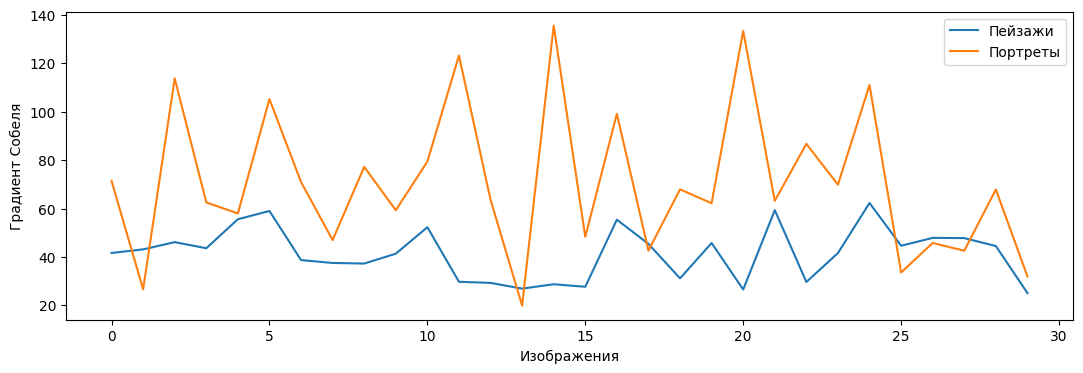

In [186]:
fig, ax = plt.subplots(figsize=(13,4))
ax.plot(grad_sob_landscapes_mean, label='Пейзажи')
ax.plot(grad_sob_portraits_mean, label='Портреты')
ax.set_xlabel('Изображения') 
ax.set_ylabel('Градиент Собеля') 
ax.legend()         
plt.show()

Судя по распределению, градиент у портретов преобладает. Это может быть связано с тем, что на портретных изображениях контуры являются наиболее ярковыраженными.

### Вектор признаков

Соберем вектор признаков из

- Среднего значения яркости
- Отношения сторон, где 1 - пейзаж, 0 - портрет
- Соотношения красного и зеленого цветов на изображении
- Отношения зеленого и синего ко всем цветам на изображении
- Среднего преобладания голубого канала
- Красного цвета в области лица

Дополнительно предобработаем данные и приведем их к одному виду

In [257]:
# 1. Среднее значение яркости
def pixels_dataset(file):
    mean_bright_list = []
    image = Image.open(file)
    image_pixels = np.asarray(image)
    bright = np.zeros((image.size[1], image.size[0]))

    for i in range(image.size[1]):
        for j in range(image.size[0]):
            bright[i,j] = 0.222 * image_pixels[i][j][0] + 0.707 * image_pixels[i][j][1] + 0.071 * image_pixels[i][j][2]

    mean_bright = np.mean(bright) 
    mean_bright_list.append(mean_bright)
    mean_bright_list = np.array(mean_bright_list)

    return mean_bright_list

# pixels_dataset('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')
# print(type(pixels_dataset('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')))


# 2. Отношение сторон, где 1 - пейзаж, 0 - портрет
def sides_image(file):
    width = np.zeros((1, ))  
    height = np.zeros((1, )) 
    relation_sides = np.zeros((1, ))  

    image = Image.open(file)
    width[0] = image.size[0]
    height[0] = image.size[1]
    relation_sides[0] = width[0] / height[0]    # отношение ширины к высоте изображения

    vect = np.zeros(1).reshape((1, 1))  

    relation_sides = relation_sides.reshape((1, 1))  

    if relation_sides[0] > 1:   # отношение сторон    
        vect[0] = 1             # 1 - ширина больше высоты
    else:
        vect[0] = 0             # 0 - высота больше ширины 

    # print(relation_sides)
    vect_double = np.array(vect.tolist())
    vect = vect_double.flatten()
    vect = np.array(vect)

    return vect

# sides_image('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')
# print(type(sides_image('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')))


# 3. Соотношение красного и зеленого цветов на изображении
def correlation_r_g(file):
    img_arrs = []
    img = Image.open(file)
    img_arr = np.array(img.convert('RGB'))
    img_arrs.append(img_arr)

    r_g = []
    for img_arr in img_arrs:
        r_mean = np.mean(img_arr[:,:,0])
        g_mean = np.mean(img_arr[:,:,1])
        r_g_correlation = r_mean / g_mean
        r_g.append(r_g_correlation)
    
    r_g = np.array(r_g)
        
    return r_g

# correlation_r_g('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')
# print(type(correlation_r_g('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')))


# 4. Отношение зеленого и синего ко всем цветам на изображении
def correlation_g_b(file):
    img_arrs = []
    img = Image.open(file)
    img_arr = np.array(img.convert('RGB'))
    img_arrs.append(img_arr)

    g_b = []
    for img_arr in img_arrs:
        r_mean = np.mean(img_arr[:,:,0])
        g_mean = np.mean(img_arr[:,:,1])
        b_mean = np.mean(img_arr[:,:,2])
        g_b_correlation = (g_mean + b_mean) / (r_mean + g_mean + b_mean)
        g_b.append(g_b_correlation)
    
    g_b = np.array(g_b)

    return g_b

# correlation_g_b('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')
# print(type(correlation_g_b('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')))


# 5. Среднее преобладание голубого канала
def b_mean(file):
    mean_list = []
    img = cv2.imread(file)
    b = img[:,:,0]
    mean_b = np.mean(b)
    mean_list.append(mean_b)

    mean_list = np.array(mean_list)

    return mean_list

# b_mean('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')
# print(type(b_mean('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')))


# 6. Красный цвет в области лица
def correlation_face_r(file):
    img_arrs = []
    img = Image.open(file)
    img_arr = np.array(img.convert('RGB'))
    img_arrs.append(img_arr)

    red = []
    for img_arr in img_arrs:
        # где 0.395 - это отношение начала лица (по ширине) к общему размеру изображения (по ширине) в среднем (800x0.395)
        # где 0.598 - это отношение конца лица (по ширине) к общему размеру изображения (по ширине) в среднем 
        # где 0.213 - это отношение начала лица (по высоте) к общему размеру изображения (по высоте) в среднем 
        # где 0.428 - это отношение начала лица (по высоте) к общему размеру изображения (по высоте) в среднем 
        r_mean = np.mean(img_arr[int(img.size[0]*0.395):int(img.size[0]*0.598), int(img.size[1]*0.213):int(img.size[1]*0.428), 0])
        g_mean = np.mean(img_arr[:, :, 1])
        b_mean = np.mean(img_arr[:, :, 2])
        r_correlation = r_mean / (r_mean + g_mean + b_mean)
        red.append(r_correlation)

    red = np.array(red)
        
    return red

# correlation_face_r('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')
# print(type(correlation_face_r('/home/ermak/semester_2/Images/Project/frederik-leiton-blondinka.jpg')))


# 7. Градиент Собеля
# def grad_sob(file):
#     gradient_list = []
#     gray = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY)
#     height, width = gray.shape

#     sobelx = np.zeros((height, width))
#     sobely = np.zeros((height, width))

#     for i in range(1, height-1):
#         for j in range(1, width-1):
#             sobelx[i,j] = (gray[i-1, j-1] + 2 * gray[i, j-1] + gray[i+1, j-1]) - (gray[i-1, j+1] + 2 * gray[i, j+1] + gray[i+1, j+1]) # для x
#             sobely[i,j] = (gray[i-1, j-1] + 2 * gray[i-1, j] + gray[i-1, j+1]) - (gray[i+1, j-1] + 2 * gray[i+1, j] + gray[i+1, j+1]) # для y

#     gradient = np.sqrt(sobelx ** 2 + sobely ** 2) # объединяем градиенты 

#     gradient_list.append(gradient)

#     mean_list = []
#     for i in range(len(gradient_list)):
#         mean_g = np.mean(gradient_list[i])
#         mean_list.append(mean_g)

#     mean_grad = np.array(mean_list)

#     return mean_grad

# grad_sob('/home/ermak/semester_2/Images/Project/tests/kulikov-i.s.-semya-lesnika.jpg')
# print(type(grad_sob('/home/ermak/semester_2/Images/Project/tests/kulikov-i.s.-semya-lesnika.jpg')))

# ВЕКТОР ПРИЗНАКОВ (всего 6)
def feature_vector(file):
    first_feature = pixels_dataset(file)
    second_feature = sides_image(file)
    third_feature = correlation_r_g(file)
    fourth_feature = correlation_g_b(file)
    fifth_feature = b_mean(file)
    sixth_feature = correlation_face_r(file)
    # seventh_feature = grad_sob(file)

    result_vector = np.concatenate([first_feature, second_feature, third_feature, fourth_feature, fifth_feature, sixth_feature])
    return result_vector

feature_vector('/home/ermak/semester_2/Images/Project/tests/landscapes/aleksei-savrasov-vid-na-moskovskii-kreml.-vesna.jpg')

array([123.33793392,   0.        ,   1.06192927,   0.65327722,
       121.75943263,   0.41272877])

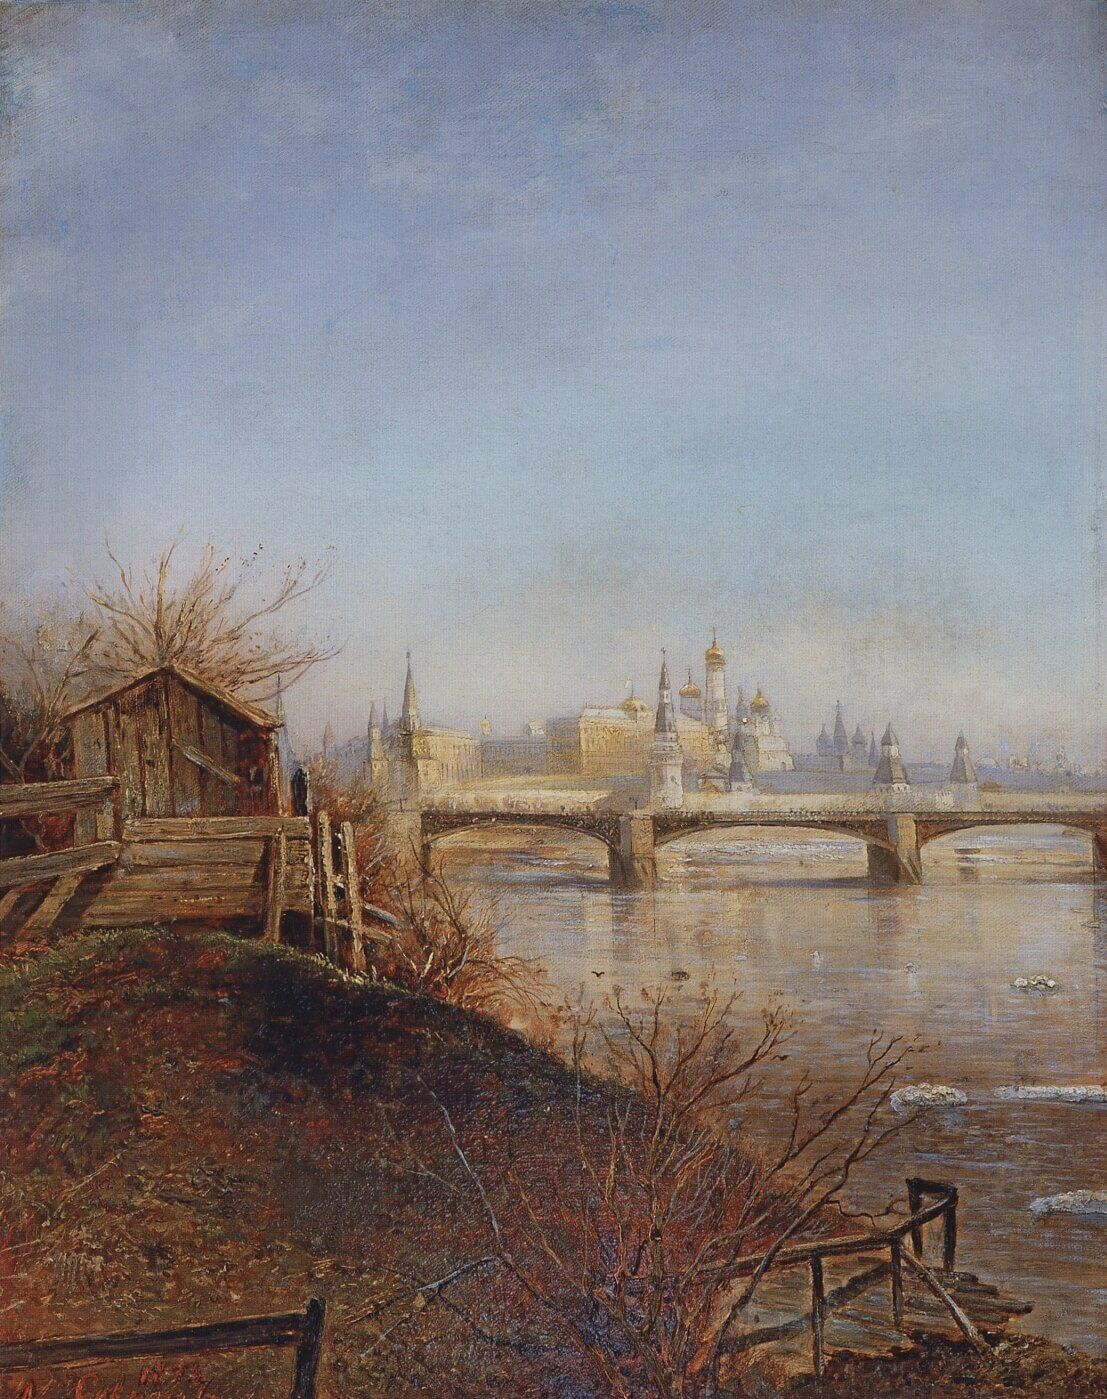

In [14]:
from IPython.display import Image
Image(filename='/home/ermak/semester_2/Images/Project/tests/landscapes/aleksei-savrasov-vid-na-moskovskii-kreml.-vesna.jpg', width=500, height=5000)

Создадим обучающий датасет из 30 портретов и 30 пейзажей + добавим к ним метку класса 'портрет' или 'пейзаж' 

In [189]:
# АЛГОРИТМЫ
# Для начала создадим общий датасет с портретами и пейзажами
def feature_vector_portraits():
    result_array = []
    for file in files_portraits:
        full_path = os.path.join(image_folder_portraits, file)
        feature_vector_result = feature_vector(full_path)
        result_array.append(['портрет'] + feature_vector_result.tolist())

    result_array = np.array(result_array)
    return np.array(result_array)

def feature_vector_landscapes():
    result_array = []
    for file in files_landscapes:
        full_path = os.path.join(image_folder_landscapes, file)
        feature_vector_result = feature_vector(full_path)
        result_array.append(['пейзаж'] + feature_vector_result.tolist())

    result_array = np.array(result_array)
    return np.array(result_array)

data = np.vstack([feature_vector_portraits(), feature_vector_landscapes()])
print(data)

[['портрет' '44.29271137514651' '0.0' '0.9328481590173456'
  '0.6587195264364253' '36.51920750293083' '0.5560962741256159']
 ['портрет' '134.51740992183903' '0.0' '1.0632523123191158'
  '0.632887151160178' '111.809' '0.4486876476732884']
 ['портрет' '76.66968788249999' '0.0' '1.2236099899408217'
  '0.5615014949113437' '42.65414375' '0.5710290484096566']
 ['портрет' '71.52393425162971' '0.0' '1.2312270255489923'
  '0.6140148842102089' '65.39824641460234' '0.569019963067585']
 ['портрет' '91.96067364680854' '0.0' '0.8440352206242399'
  '0.6804098149896126' '77.06815035460993' '0.442865882602259']
 ['портрет' '109.18624942828487' '0.0' '1.018835477461794'
  '0.6625848502605044' '108.80185757271815' '0.3663702607163464']
 ['портрет' '88.06763983306061' '0.0' '1.0376230936865254'
  '0.6260587123777855' '65.60005400981997' '0.47692299922890447']
 ['портрет' '118.4027659179013' '0.0' '1.201626566697383'
  '0.599355045891582' '91.65308518518519' '0.4026928716990935']
 ['портрет' '46.4564105412

### Алгоритмы

Воспользуемся тремя алгоритмами для классификации изображений

- Наивным байесовским классификатором
- Методом k ближайших соседей
- Методом опорных векторов 

In [281]:
# 1. Применим НБА
# преобразуем data
X = data[:, 1:].astype(float)
y = data[:, 0] # все классы

# обучаем модель 
def fit(X, y):
    unique_classes = np.unique(y) # находим уникальные классы (портрет, пейзаж)
    # задаем размерность для двух классов
    mean = np.zeros((len(unique_classes), X.shape[1]))
    var = np.zeros((len(unique_classes), X.shape[1]))
    proba = np.zeros(len(unique_classes))

    # вычисляем средние, дисперсии и вероятности для каждого класса
    for idx, yi in enumerate(unique_classes): # задаем счетчик индексов (0-портрет, 1-пейзаж)
        mean[idx, :] = np.mean(X[y == yi], axis=0)
        var[idx, :] = np.var(X[y == yi], axis=0)
        proba[idx] = sum(y == yi) / len(y)

    return mean, var, proba

# обучаем модель
mean, var, proba = fit(X, y)

# тестовые данные
test_data = feature_vector('/home/ermak/semester_2/Images/Project/tests/landscapes/aleksei-savrasov-vid-na-moskovskii-kreml.-vesna.jpg')
test_data = test_data.reshape(1, -1) 

# предсказываем 
def predict(test_data, mean, var, proba):
    result = []
    unique_classes = len(proba) # 2 класса

    for xi in test_data: # вычисляем вероятность для каждого класса 
        max_proba, max_class = -1, None # инициализируем максимальную вероятность и соответствующий класс

        for yi in range(unique_classes): # вычисляем вероятность для каждого класса
            p = np.prod(np.exp(-(xi - mean[yi]) ** 2 / (2 * var[yi])) / np.sqrt(2 * np.pi * var[yi])) * proba[yi]
            # если вероятность текущего класса больше максимальной, устанавливаем новую максимальную вероятность и класс
            if p > max_proba:
                max_proba, max_class = p, yi

    # добавляем метку класса с наибольшей вероятностью
    result.append(np.unique(y)[max_class])

    return result

predictions = predict(test_data, mean, var, proba)
naive_bayes = predictions
# print(predictions)



# 2. Применим метод k ближайших соседей
test = feature_vector('/home/ermak/semester_2/Images/Project/tests/landscapes/aleksei-savrasov-vid-na-moskovskii-kreml.-vesna.jpg')    
test = test.reshape(1, -1) 

arr = data[:, 1:]
arr = arr.astype(np.float64)

classes = data[:, 0]
classes = np.where(classes == 'портрет', 0, classes)
classes = np.where(classes == 'пейзаж', 1, classes)

k = 3   

neighbours = [] # сохраняем соседей         
              
for n in range(len(test)):
    # записываем расстояния
    distances = []                       
    for i in range(len(arr)):
        dist = np.sqrt(np.sum((test[n] - arr[i])**2))
        distances.append((dist, classes[i]))
    distances = sorted(distances)
    min_distance = []
    for j in range(k):
        # добавляет классы ближайших соседей в список min_distance
        min_distance.append(distances[j]) # смотрим на первых k ближайших соседей
        second_elements = [x[1] for x in min_distance] # выводим только номера кластеров
# print(distances)
# print(min_distance)
# print(second_elements) 

labels = [label for _, label in min_distance]

major_label = max(set(labels), key=labels.count)

def major(major_label):
    if major_label == '0':
        return ['портрет']
    else:
        return ['пейзаж']

knn = major(major_label)
# print(major(major_label))



# 3. Метод опорных векторов
X = data[:, 1:]
X = X.astype(np.float64)

y = data[:, 0]
y = np.where(y == 'пейзаж', 1, y) # поскольку так лучше гиперплоскость строить
y = np.where(y == 'портрет', -1, y)  
y = y.astype(int)

test = feature_vector('/home/ermak/semester_2/Images/Project/tests/landscapes/aleksei-savrasov-vid-na-moskovskii-kreml.-vesna.jpg')
test = test.reshape(1, -1)

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) # нормализуем среднее = 0 и стн отклонение = 1
test = (test - np.mean(X, axis=0)) / np.std(X, axis=0)

w = np.zeros(X.shape[1])
learning_rate = 0.0001
lambda_r = 0.01 

# функция потерь hinge (для бинарной классификации) sum(max(1 - y * pred(x), 0))
def hinge_loss(w, X, y):
    return np.max(0, 1 - y * np.dot(X, w)).sum()

for iter in range(1, 5001):  
    for i in range(X.shape[0]):
        xi, yi = X[i], y[i]
        if yi * np.dot(xi, w) < 1: 
            w += learning_rate * (xi * yi - 2 * lambda_r * w) # обновляем веса 
        else:
            w += learning_rate * (-2 * lambda_r * w) # (-2 * lambda_r * w) регуляризация для предотвращения переобучения

test_label = np.sign(np.dot(test, w)) # sign чтобы вернуть класс

def test(test_label):
    if test_label == [-1.]:
        return ['портрет']
    else:
        return ['пейзаж']

svm = test(test_label)
# print(test(test_label))



# РЕЗУЛЬТАТ
print('Наивный байесовский классификатор: ' + str(naive_bayes) + 
      ', Метод k ближайших соседей: ' + str(knn) + 
      ', Метод опорных векторов: ' + str(svm))

Наивный байесовский классификатор: ['портрет'], Метод k ближайших соседей: ['пейзаж'], Метод опорных векторов: ['пейзаж']


### Тесты

Создадим дополнительные датасеты, состоящие из 10 изображений портретов и 10 пейзажей

In [284]:
test_folder_portraits = '/home/ermak/semester_2/Images/Project/tests/portraits'
test_folder_landscapes = '/home/ermak/semester_2/Images/Project/tests/landscapes'

test_files_portraits = os.listdir(test_folder_portraits) # список изображений
test_files_landscapes = os.listdir(test_folder_landscapes)

test_df = pd.DataFrame(test_files_portraits, columns=['Портреты'])
new_column = test_files_landscapes
test_df['Пейзажи'] = new_column

test_df

,Портреты,Пейзажи
0,konstantin_makovskii_zhenskii_portret.jpg,ivan_aivazovskii_bereg_neapolya._vid_vezuviya.jpg
1,konstantin_makovskii_avtoportret.jpg,isaak_levitan_vladimirka.jpg
2,mjeri_uait_devushka_na_lugu.jpg,aleksei-savrasov-vid-na-moskovskii-kreml.-vesn...
3,karl_bryullov_portret_a._n._demidova.jpg,ivan_aivazovskii_posle_buri.jpg
4,diego_velaskes_portret_filippa_iv.jpg,van_gog_zvjozdnaya_noch.jpg
5,jedgar_dega_zvezda_baleta.jpg,tatyana_yablonskaya_na_dnepre.jpg
6,piter_rubens_konnyi_portret_gertsoga_lerma.jpg,ivan_shishkin_berezovyi_les.jpg
7,ivan_kramskoi_za_chteniem._portret_s.n._kramsk...,arhip_kuindzhi_lunnaya_noch_na_dnepre.jpg
8,aivazovskii_i._k_a._s._pushkin_na_beregu_chern...,tatyana_yablonskaya_tuman.jpg
9,repin_i.e._portret_pisatelnitsy_natalii_boriso...,ivan_aivazovskii_devyatyi_val.jpg


Проверим работу алгоритмов на классификации тестовых изображений, где 0 - верно классифицированные объекты, а 1 - неверно классифицированные

In [285]:
# для пейзажей
naive_bayes_test = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
test_df.insert(2, 'НБА_landscapes', naive_bayes_test)

knn_test = [0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
test_df.insert(3, 'kNN_landscapes', knn_test)

svm_test = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
test_df.insert(4, 'SVM_landscapes', svm_test)

# для портретов
naive_bayes_test_1 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
test_df.insert(1, 'НБА_portraits', naive_bayes_test_1)

knn_test_1 = [0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
test_df.insert(2, 'kNN_portraits', knn_test_1)

svm_test_1 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
test_df.insert(3, 'SVM_portraits', svm_test_1)

test_df

,Портреты,НБА_portraits,kNN_portraits,SVM_portraits,Пейзажи,НБА_landscapes,kNN_landscapes,SVM_landscapes
0,konstantin_makovskii_zhenskii_portret.jpg,0,0,0,ivan_aivazovskii_bereg_neapolya._vid_vezuviya.jpg,0,0,0
1,konstantin_makovskii_avtoportret.jpg,0,0,0,isaak_levitan_vladimirka.jpg,0,0,0
2,mjeri_uait_devushka_na_lugu.jpg,0,1,0,aleksei-savrasov-vid-na-moskovskii-kreml.-vesn...,1,0,0
3,karl_bryullov_portret_a._n._demidova.jpg,0,0,0,ivan_aivazovskii_posle_buri.jpg,0,0,0
4,diego_velaskes_portret_filippa_iv.jpg,0,0,0,van_gog_zvjozdnaya_noch.jpg,0,0,0
5,jedgar_dega_zvezda_baleta.jpg,0,1,0,tatyana_yablonskaya_na_dnepre.jpg,0,0,0
6,piter_rubens_konnyi_portret_gertsoga_lerma.jpg,0,0,0,ivan_shishkin_berezovyi_les.jpg,0,1,0
7,ivan_kramskoi_za_chteniem._portret_s.n._kramsk...,0,0,0,arhip_kuindzhi_lunnaya_noch_na_dnepre.jpg,0,1,0
8,aivazovskii_i._k_a._s._pushkin_na_beregu_chern...,1,0,1,tatyana_yablonskaya_tuman.jpg,0,0,0
9,repin_i.e._portret_pisatelnitsy_natalii_boriso...,0,0,0,ivan_aivazovskii_devyatyi_val.jpg,0,1,0


Можно заметить, что там где НБА и SVM ошибаются, kNN обычно выдает верный ответ. 

Таким образом, процент верных классификаций для каждого из трех алгоритмов будет составлять

- 90% верных классификаций для НБА
- 75% верных классификаций для kNN
- 95% верных классификаций для SVM

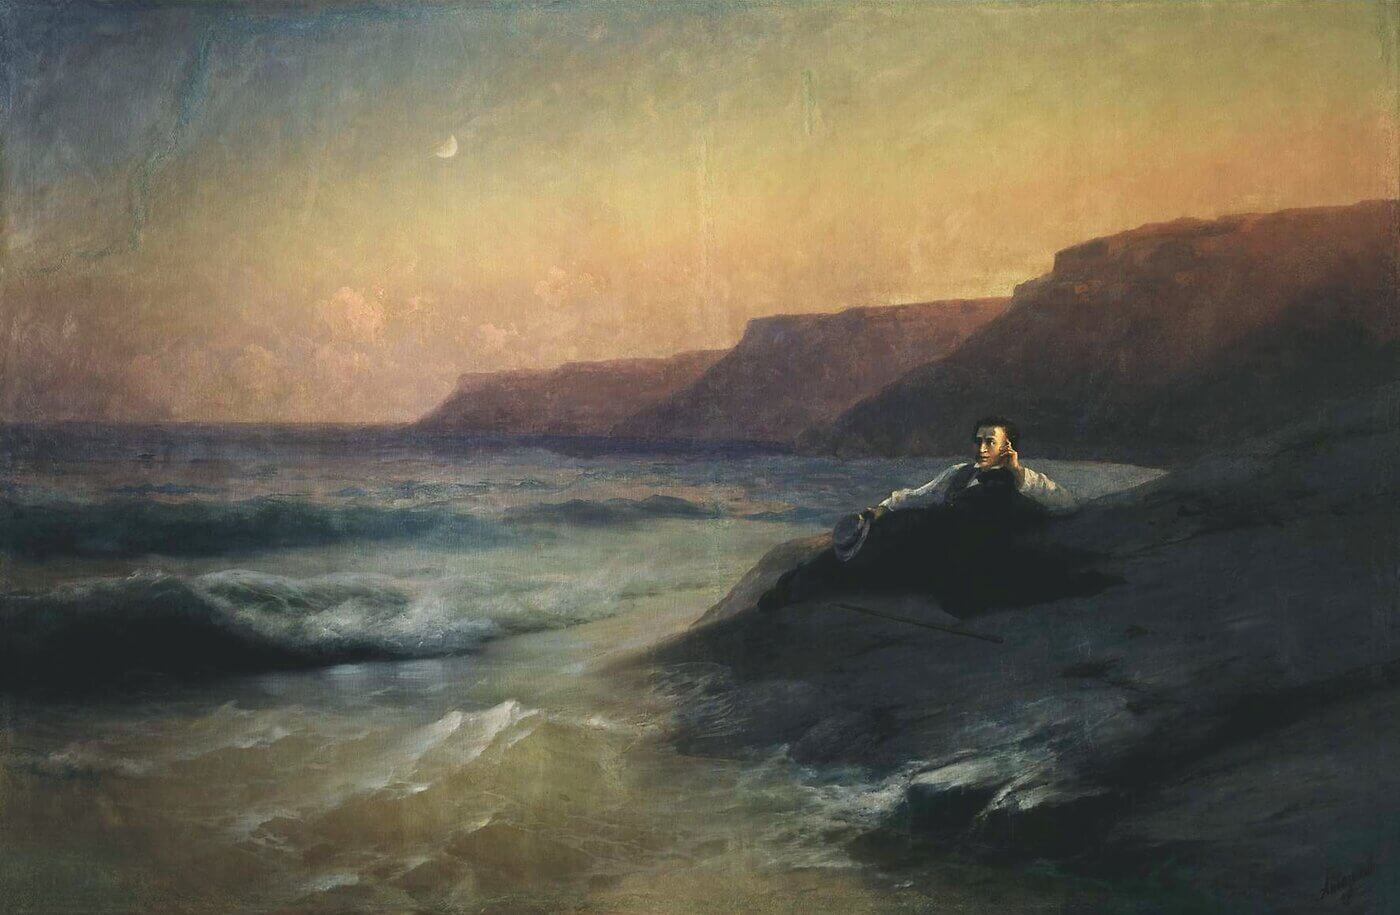

In [19]:
Image(filename='/home/ermak/semester_2/Images/Project/tests/portraits/aivazovskii_i._k_a._s._pushkin_na_beregu_chernogo_morya.jpg', width=800, height=300)

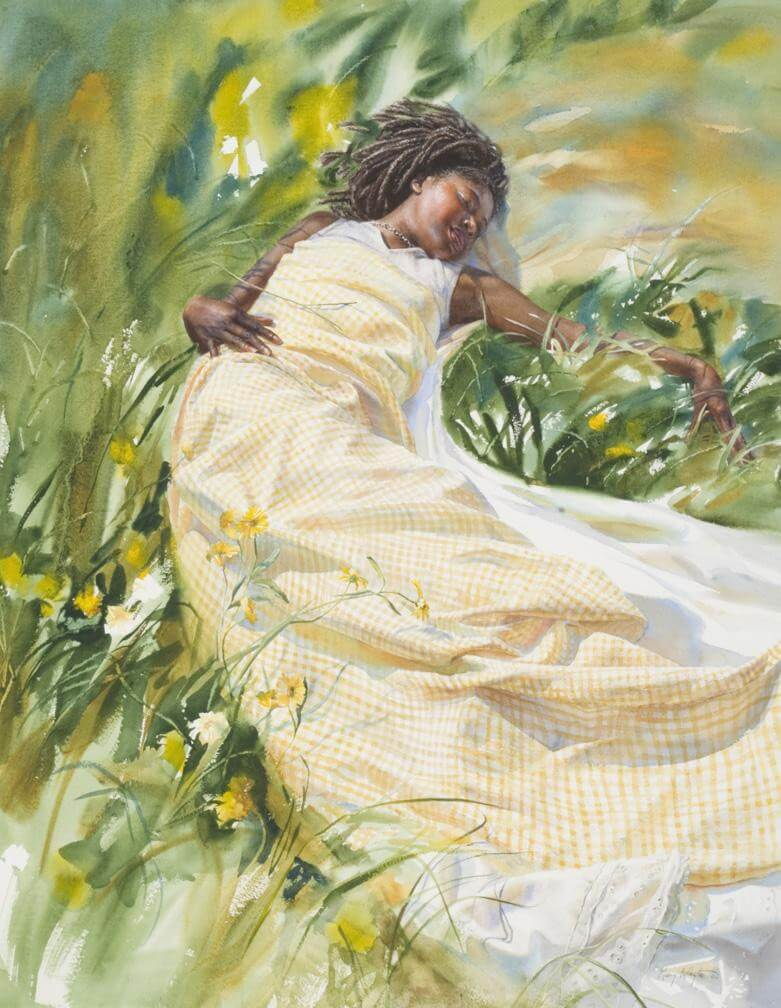

In [15]:
Image(filename='/home/ermak/semester_2/Images/Project/tests/portraits/mjeri_uait_devushka_na_lugu.jpg', width=500, height=1000)

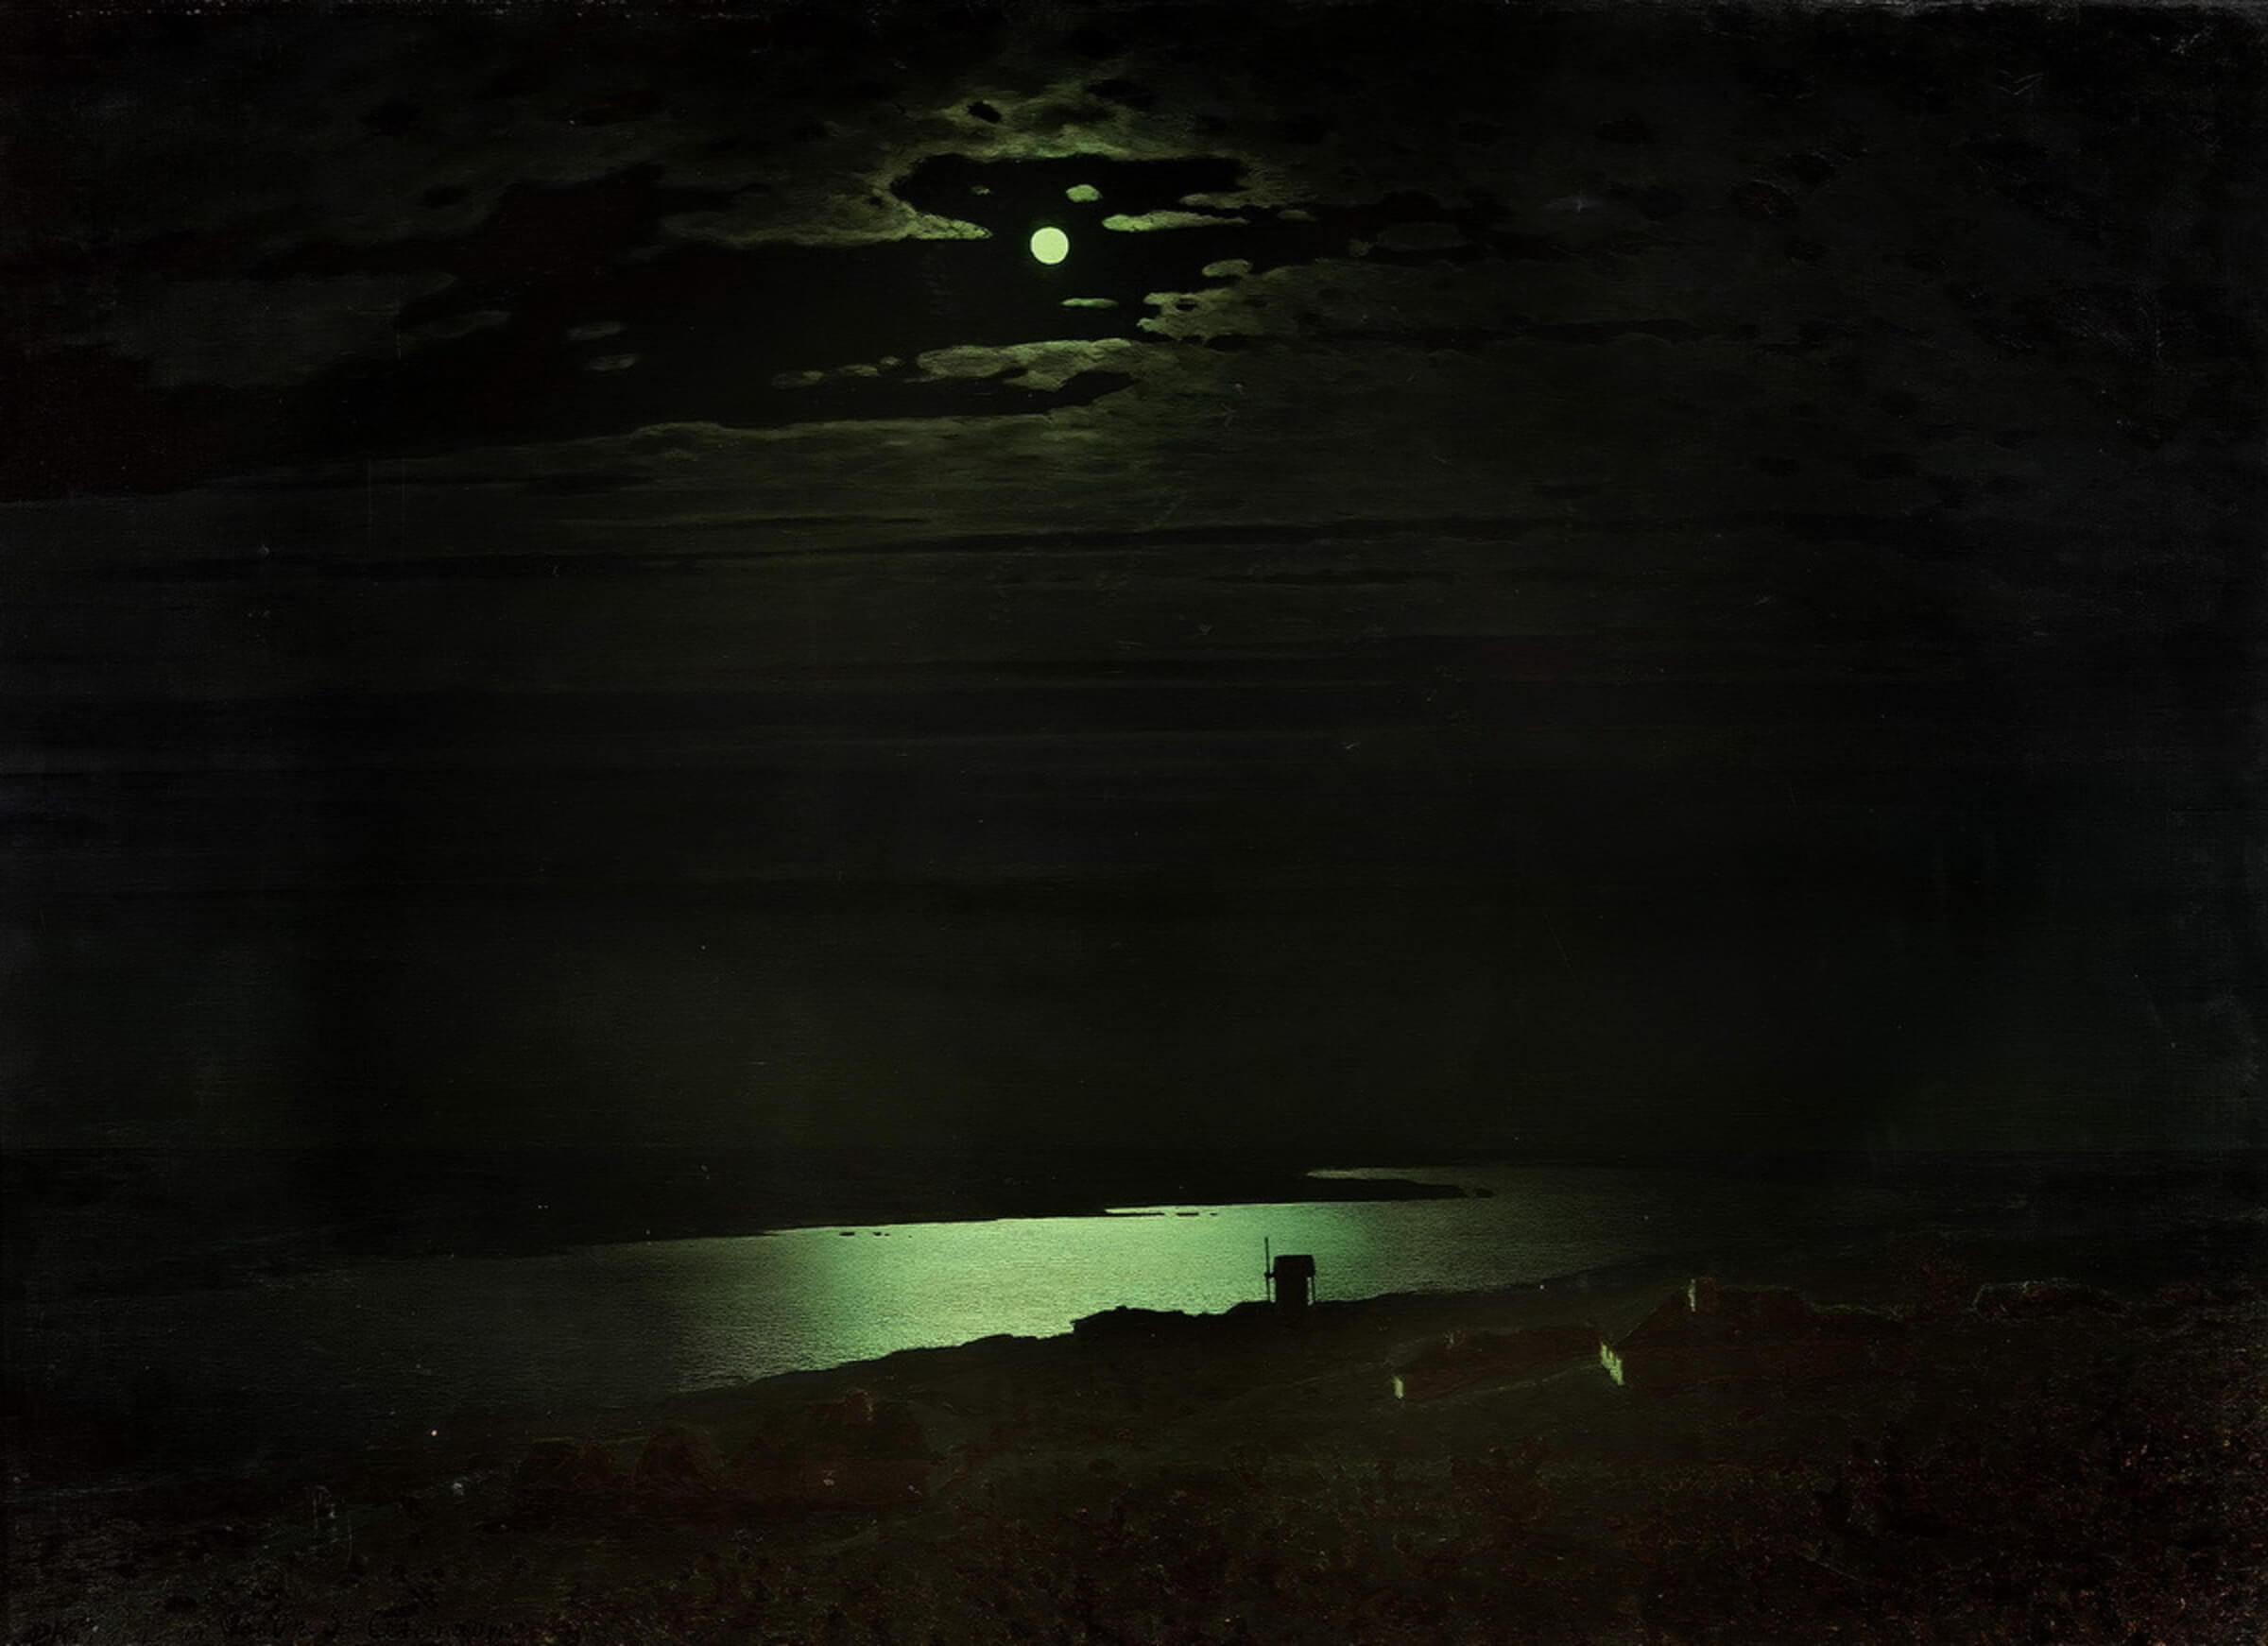

In [20]:
Image(filename='/home/ermak/semester_2/Images/Project/tests/landscapes/arhip_kuindzhi_lunnaya_noch_na_dnepre.jpg', width=800, height=300)

Исходя из этого, можно дать следующие веса алгоритмам для классификации объектов 

In [288]:
naive_bayes_weight = 0.346
knn_weight = 0.289
svm_weight = 0.365

answers = (naive_bayes) + (knn) + (svm)
answer_key = {"пейзаж": 1, "портрет": -1}
answers_array = np.array([answer_key[answer] for answer in answers])

weights = np.array([svm_weight, naive_bayes_weight, knn_weight])
weighted_results = answers_array * weights

total_error = np.mean(weighted_results) 
total_error = np.mean(weighted_results) * 100

if total_error > 0:
    print('Общий ответ: пейзаж')
else:
    print('Общий ответ: портрет')

print('Ответ алгоритмов:', answers)
# print(answers_array)
# print(weighted_results)

Общий ответ: пейзаж
Ответ алгоритмов: ['портрет', 'пейзаж', 'пейзаж']
